<a href="https://colab.research.google.com/github/ftkovr9k/MAGIC-gamma-hadron-classifier/blob/main/MAGIC_gamma_hadron_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Adding Columns and converting Gamma & Hadron classes to numeric values.

In [3]:
#Create columns
cols = ["fLength",
"fWidth",
"fSize",
"fConc",
"fConc1",
"fAsym",
"fM3Long",
"fM3Trans",
"fAlpha",
"fDist",
"class"]

#Add Column name

#Read from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Magic Gamma-Hadron data set/magic04.data', names=cols)

#Read from temporary space in Colab
#df = pd.read_csv("magic04.data", names=cols)

#Convert classes to numeric
df["class"] = (df["class"] == "g").astype(int)

#Remove rows with missing values
df.dropna(inplace=True)

#Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Drawing Histograms to visualize

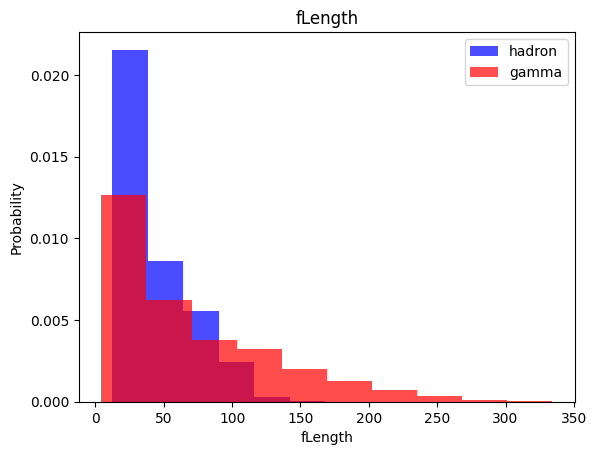

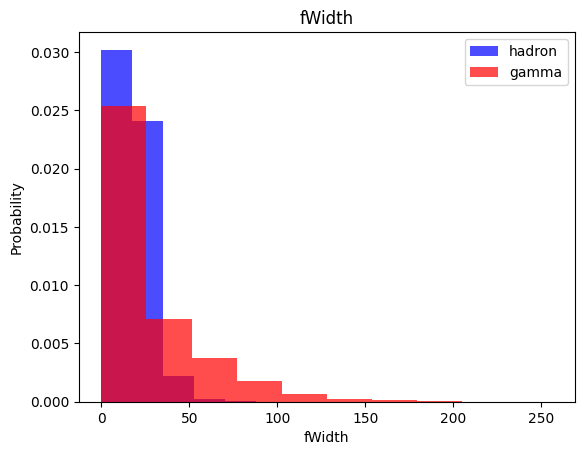

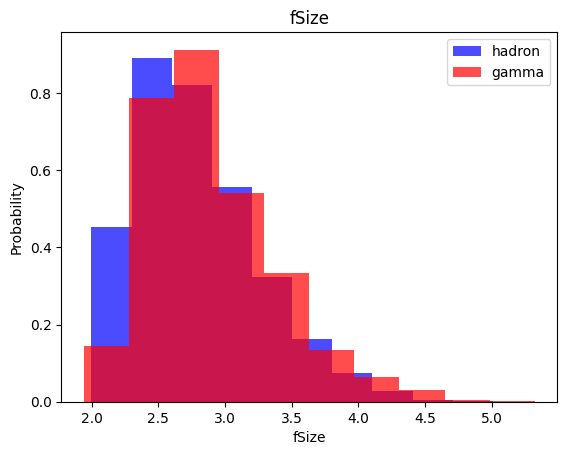

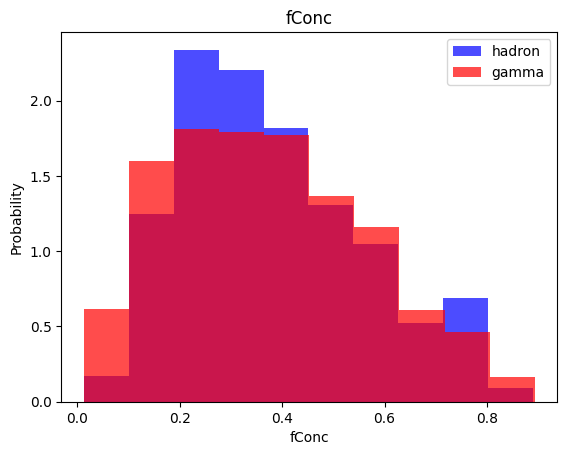

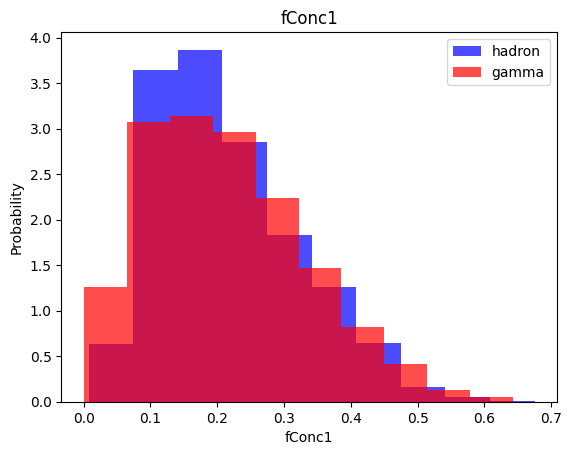

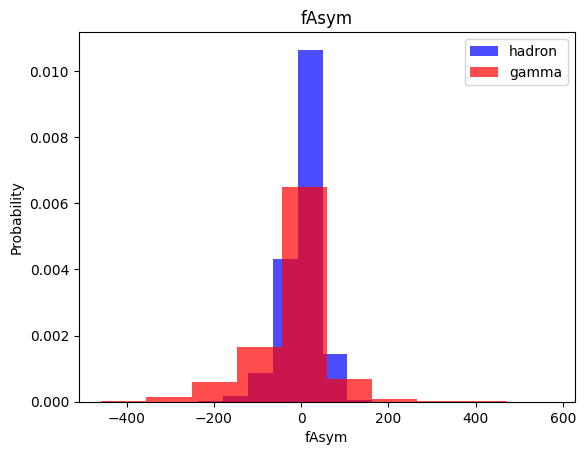

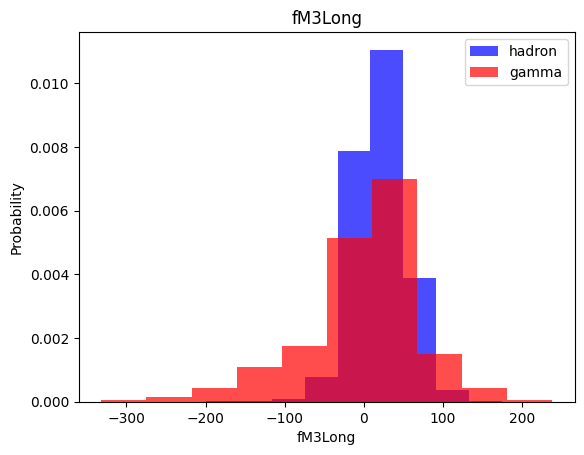

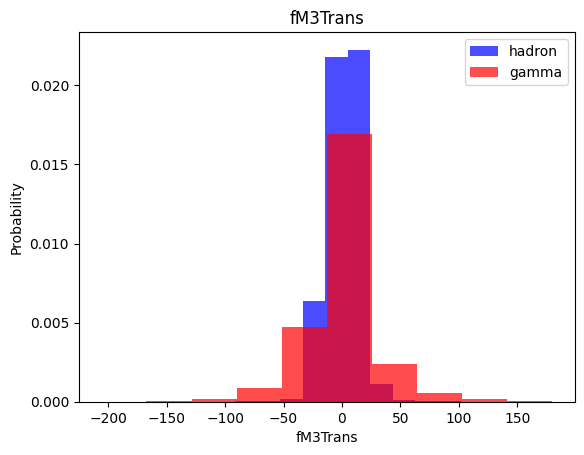

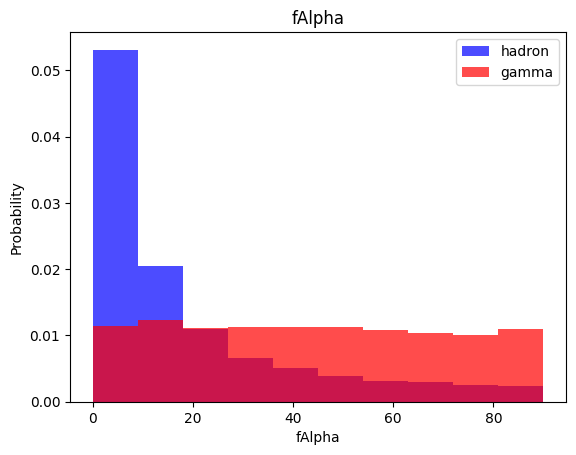

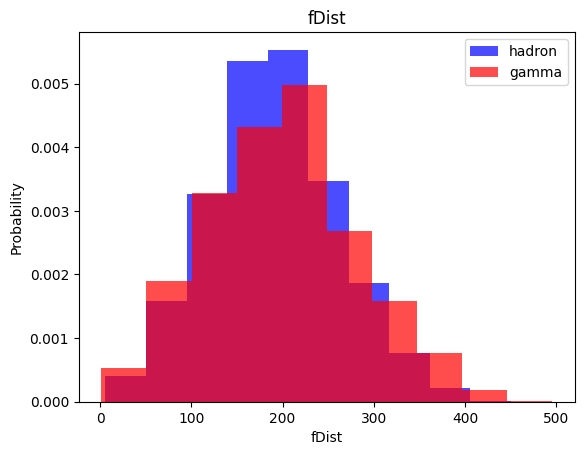

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label="hadron", alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label="gamma", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Split data set into Train, Validation and Test

In [25]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

print(train.shape)
print(valid.shape)
print(test.shape)

(11343, 11)
(3781, 11)
(3781, 11)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scale of data is currently way off. Create a function to scale

In [6]:
def scale_data(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


There is a huge gap in the train data set between hadron and gamma

In [7]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

7335
4008


Increase the number of hadron. There is a overample parameter in the scale_data() function.

In [8]:
train, X_train, y_train =  scale_data(train, oversample=True)
valid, X_valid, y_valid =  scale_data(valid, oversample=False)
test, X_test, y_test =  scale_data(test, oversample=False)

Visualize again

In [9]:
print(sum(y_train == 1)) #gamma
print(sum(y_train == 0)) #hadron


7335
7335


**Preprocessing is complete. Running different models.**

k-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1275
           1       0.87      0.86      0.86      2506

    accuracy                           0.82      3781
   macro avg       0.80      0.80      0.80      3781
weighted avg       0.82      0.82      0.82      3781



Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1275
           1       0.75      0.89      0.82      2506

    accuracy                           0.73      3781
   macro avg       0.71      0.66      0.67      3781
weighted avg       0.72      0.73      0.72      3781



Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1275
           1       0.85      0.82      0.84      2506

    accuracy                           0.79      3781
   macro avg       0.76      0.77      0.77      3781
weighted avg       0.79      0.79      0.79      3781



Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

In [17]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1275
           1       0.90      0.89      0.89      2506

    accuracy                           0.86      3781
   macro avg       0.84      0.84      0.84      3781
weighted avg       0.86      0.86      0.86      3781



**Running Neural Network models**

In [18]:
import tensorflow as tf

In [35]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [28]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

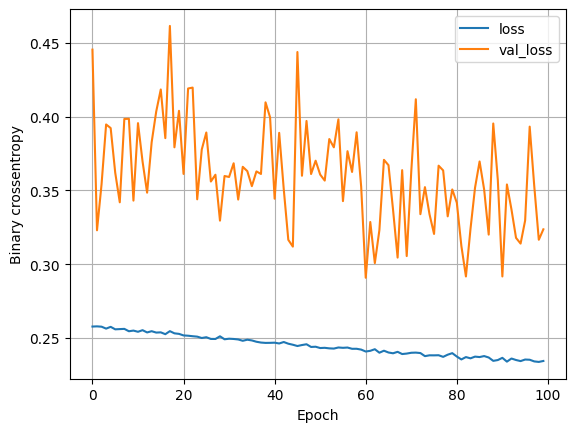

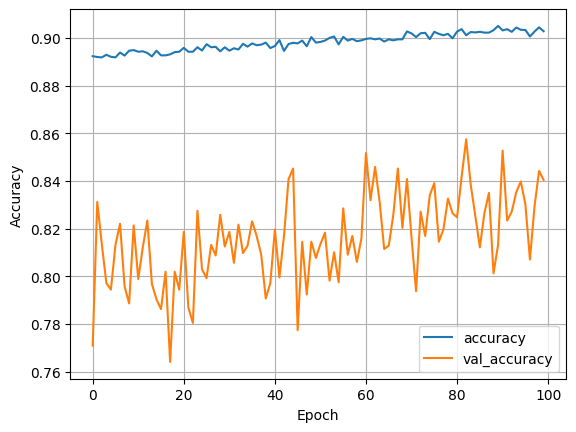

In [36]:
plot_loss(history)
plot_accuracy(history)